In [2]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from pandas import DataFrame
from typing import List, Optional, Dict
import os.path as path, pandas as pd, seaborn as sb

sb.set_style('darkgrid')

# Abra o arquivo, defina o separador de colunas e de números decimais
url_file = 'https://raw.githubusercontent.com/duraes-antonio/data_science_visualizacao_dados/master/data/microdados_enade_2018/2018/3.DADOS/microdados_enade_2018_edit.csv?token=AI4UBUEBFJL3MDTYDURUI327KV74O'
df = pd.read_csv(url_file, sep=';', decimal=',')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CO_RS_I1,CO_RS_I3,NT_GER,QE_I01,QE_I02,QE_I08,QE_I04,QE_I15,QE_I17,QE_I23
0,D,C,42.8,A,D,C,D,A,A,B
1,B,A,59.3,B,A,D,B,A,A,C
2,C,C,60.9,A,A,E,D,A,A,D
3,D,E,25.0,A,A,D,D,A,A,E
4,D,A,42.4,A,B,E,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...
548122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548124,NaN,NaN,NaN,A,B,C,B,A,A,D
548125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def set_title_axis(ax: Axes, title: Optional[str] = None, xlabel: Optional[str] = None, ylabel: Optional[str] = None) -> Axes:
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

# Substitui todas ocorrências de um valor por uma string (usado p/ trocar os valores por um label apresentável)
def replace_df_value_by_str(df: DataFrame, value_str: Dict[str, str]) -> DataFrame:
    if not value_str: return df
    df_clone = df.copy()
    
    for key in value_str:
      df_clone = df_clone.replace(key, value_str[key])

    return df_clone

# Plota um gráfico de pizza, com legenda e porcentagem de cada dado
def plot_pie_graph(df: DataFrame, x_col: str, categories: Dict[str, str], title: Optional[str]):
    count: Dict[str, int] = df[x_col].value_counts()
    value_freqs = [count[value] for value in count.index.tolist()]
    labels = [categories[value] for value in count.index.tolist()]

    total = sum(value_freqs)
    labels_perct = ['%s (%2.1f%%)' % (labels[i], value_freqs[i] / total * 100)
                    for i in range(len(labels))]
    plt.subplots(figsize=(8, 6))
    plt.axis('equal')
    patches, texts = plt.pie(value_freqs, startangle=30)
    plt.legend(handles=patches, labels=labels_perct, loc='best')
    plt.title(title)
    plt.show()

# Plota um gráfico boxplot, com título, eixos nomeados
def plot_boxplot(df: DataFrame, col_x: str, col_y: str, title: str, xlabel: str, ylabel: str, categories: Dict[str, str]):
    df = df.sort_values(by=[col_x])
    
    for key in categories:
        df[col_x] = df[col_x].replace(key, categories[key])
    df[col_y] = df[col_y].astype(float)
    plt.subplots(figsize=(12, 8))
    ax = sb.boxplot(x=df[col_x], y=df[col_y])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    set_title_axis(ax, title, xlabel, ylabel)
    plt.show()

# Plota um gráfico semelhante ao boxplot, com título, eixos nomeados
def plot_catplot_box(df: DataFrame, col_x: str, col_y: str, xlabel: str, ylabel: str, categories: Dict[str, str]):
    df = df.sort_values(by=col_x, ascending=True)
    df[col_y] = df[col_y].astype(float)
    df[col_x] = replace_df_value_by_str(df[col_x], categories)
    ax = sb.catplot(x=col_x, y=col_y, kind='boxen', data=df, height=7)
    ax.set_axis_labels(xlabel, ylabel)
    plt.show()

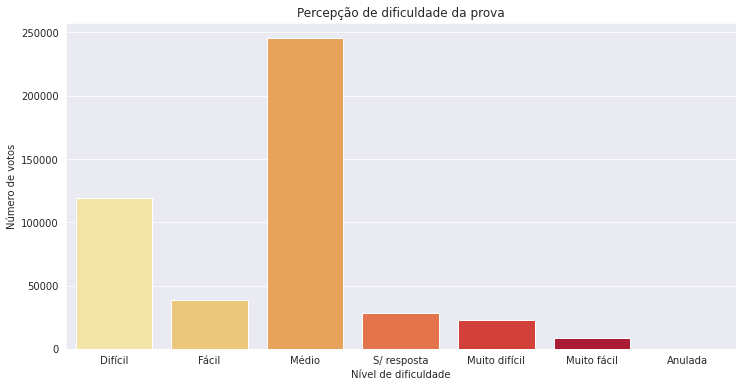

In [4]:
categories = {'A': 'Muito fácil', 'B': 'Fácil', 'C': 'Médio', 'D': 'Difícil', 'E': 'Muito difícil', '.': 'S/ resposta', '*': 'Anulada'}
x_col = 'CO_RS_I1'
df[x_col] = replace_df_value_by_str(df[x_col], categories)
plt.subplots(figsize=(12, 6))
ax = sb.countplot(data=df, x=x_col, palette=sb.color_palette('YlOrRd'))
set_title_axis(ax, 'Percepção de dificuldade da prova', 'Nível de dificuldade', 'Número de votos');

## Percepção de dificuldade
É possível ver que há uma distribuição esperada das respostas. Houve uma minoria de respostas anuladas (que foram ínfimas) e as ausentes (que superaram o número de 25 mil), um pouco mais da metade disse que a prova estava em uma dificuldade média, um quarto disse que estava difícil. É importante notar que a soma de "**muito difícil**" e "**difícil**" é cerca do tripo do volume da soma de "**fácil**" e "**muito fácil**", indicando uma percepção geral de que a prova tenha dificuldade **média-difícil**.

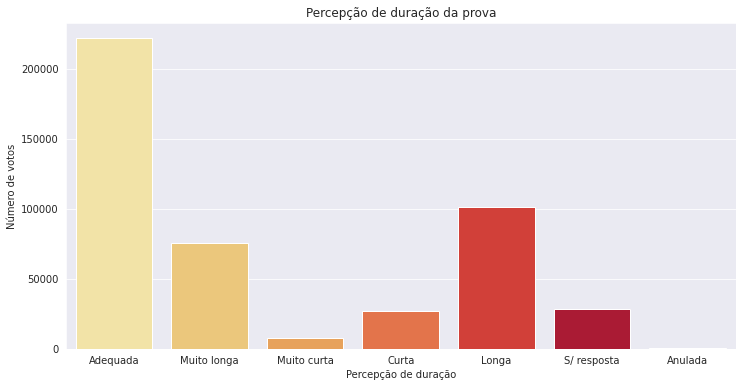

In [5]:
categories = {'A': 'Muito longa', 'B': 'Longa', 'C': 'Adequada', 'D': 'Curta', 'E': 'Muito curta', '.': 'S/ resposta', '*': 'Anulada'}
x_col = 'CO_RS_I3'
df[x_col] = replace_df_value_by_str(df[x_col], categories)
plt.subplots(figsize=(12, 6))
ax = sb.countplot(data=df, x=x_col, palette=sb.color_palette('YlOrRd'))
set_title_axis(ax, 'Percepção de duração da prova', 'Percepção de duração', 'Número de votos');

## Percepção sobre a duração
Essa distribuição assemelha-se a de dificuldade, quase metade das respostas relatam sentir que a duração da prova foi adequada; do restante, a maioria sentiu que foi **"longa"**, **"muito longa"** e **"curta"**, respectivamente. Visualmente, a soma de **"muito curta"** e **"curta"** é cerca de quatro vezes menor que a soma de **"muito longa"** e **"longa"**, também é importante notar que o volume de **"muito longa"** é 3/4 do de **"longa"**, indicando que a percepção geral da duração da prova foi de **"adequada-longa"**. *Seria relevante apurar outros fatores sobre os estudantes que responderam "curta" ou "muito curta", além de principalmente, reavaliar a estrutura da prova, dificuldade e número de questões, em detrimento do número de respostas alegando duração alta.*

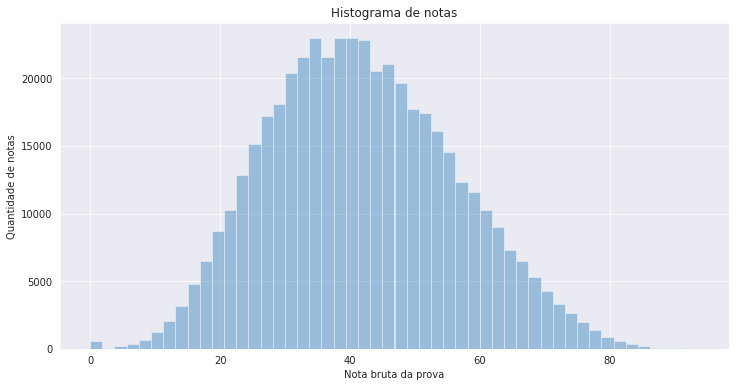

In [6]:
plt.subplots(figsize=(12, 6))
ax = sb.distplot(df['NT_GER'], kde=False)
set_title_axis(ax, 'Histograma de notas', 'Nota bruta da prova', 'Quantidade de notas');

## Distribuição da nota bruta
Tendo em vista que a prova tem valor bruto de 0 a 100, o primeiro ponto de atenção é que o volume de notas de **0 a 20** é bem maior que o de **80 a 100**, assim como o volume de notas de **20 a 40** é, pelo menos, o dobro do de notas de **60 a 80**. É importante notar que 40% (0 a 40) da nota bruta concentra cerca da metade do volume de dados, a faixa 20 a 40 tem volume semelhante ao da faixa 40 a 60. *O fato de quase a totalidade dos dados localizar-se abaixo de 60% da nota bruta, reforça a necessidade de reavaliar a proximidade entre questões na prova com o conteúdo, material e experiências proporcionadas pelo ensino superior; refletir sobre a eficácia do Enade atual e/ou da qualidade dos componentes dispostos nas grades curriculares*.

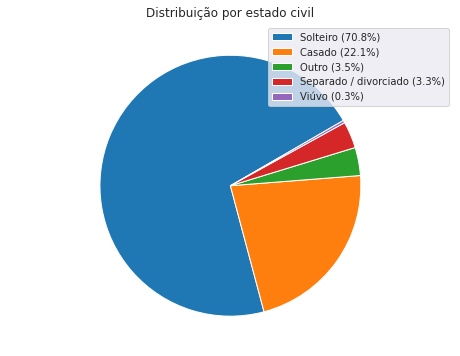

In [7]:
categories = {'A': 'Solteiro', 'B': 'Casado', 'C': 'Separado / divorciado', 'D': 'Viúvo', 'E': 'Outro'}
plot_pie_graph(df, 'QE_I01', categories, 'Distribuição por estado civil')

## Distribuição por estado civil

Considerando que grande parte dos ingressantes no ensino superior são jovens, o gráfico reflete o perfil e a situação afetiva dessas pessoas. O volume maior de solteiros pode ser explicado pelo fato do jovem estar conhecendo alguém; ter a carreira acadêmica, emancipação financeira e profissional como prioridade de vida; ou simplesmente estar amadurecendo, e por isso essa fatia deve ser composta por pessoas majoritariamente jovens, sozinhos ou em um relacionamento não estável (namoro). Já a segunda maior fatia, casados, deve ser composta por pessoas em fase adulta, com uma vida profissional estável, ou que estão buscando uma segunda formação/qualificação, ou simplesmente desejam se aventurar por uma nova jornada. A maturidade e estabilidade desse segundo grupo talvez sejam fatores fundamentais para concluírem o ensino superior (e consequentemente, prestar o Enade).

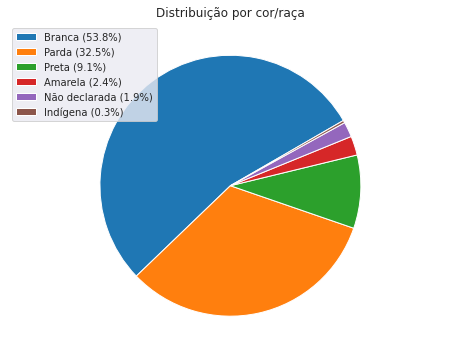

In [8]:
categories = {'A': 'Branca', 'B': 'Preta', 'C': 'Amarela', 'D': 'Parda', 'E': 'Indígena', 'F': 'Não declarada'}
plot_pie_graph(df, 'QE_I02', categories, 'Distribuição por cor/raça')

## Distribuição por cor/raça
Se comparada à distribuição étnica no Brasil, essa coleção de dados apresenta uma distorção, principalmente no desiquilíbrio presente na proporção de pessoas brancas e negras (pretas e pardas), essas últimas constituem um pouco mais da metade da população nacional, ao passo que no gráfico somam 41.6%. Em complemento com essa representação, seria de grande relevância analisar a distribuição étnica das pessoas que concluem o ensino superior. *__Sem ter acesso a outras informações de apoio__, o gráfico pode indicar que pessoas brancas ocupam maior parte das vagas do ensino superior ou possuem menos obstáculos até o momento de conclusão do curso e consequentemente, até o momento de prestar a avaliação, do que pessoas de outras etnias.*

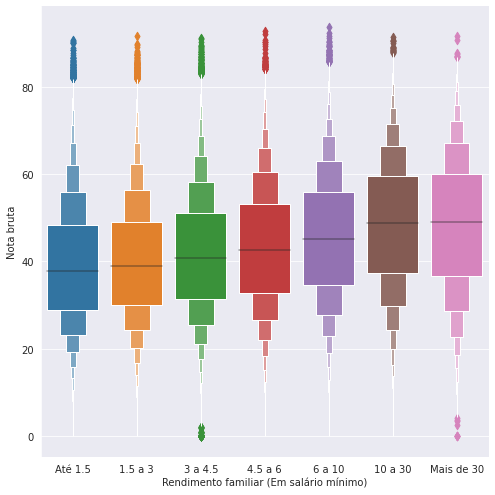

In [15]:
categories = {
    'A': 'Até 1.5', 'B': '1.5 a 3', 'C': '3 a 4.5', 'D': '4.5 a 6',
    'E': '6 a 10', 'F': '10 a 30', 'G': 'Mais de 30'
}
plot_catplot_box(df, 'QE_I08', 'NT_GER', 'Rendimento familiar (Em salário mínimo)', 'Nota bruta', categories)

## Rendimento familiar
É nítido que o aumento da nota bruta segue com a quantidade de salários-mínimos (SM), além das semelhanças entre os grupos que recebem até 3 SM, e entre aqueles recebem acima de 10 SM mensais. Outro ponto de atenção é que cerca de 50% dos candidatos dos grupos que recebem até 3 SM obtiveram notas entre cerca de 30 e 50 pontos, e os que receberam acima de 10 SM, entre cerca de 36 e 60 pontos, além disso é possível ver que quem recebe menos salários apresentam mais pontos de exceção *(outliers)* com nota alta, enquanto grupos mais ricos normalizam essas notas altas e apresentam, portanto, menos *outliers* acima da mediana. *Essa relação pode ser explicada pelo fato de alunos de famílias mais ricas poderem ter acesso a um ensino mais diverso, integrativo e interdisciplinar; não possuírem a necessidade de ter vínculo empregatício; ter acesso a todo material (livros, computador, cursos) e suporte necessário.*

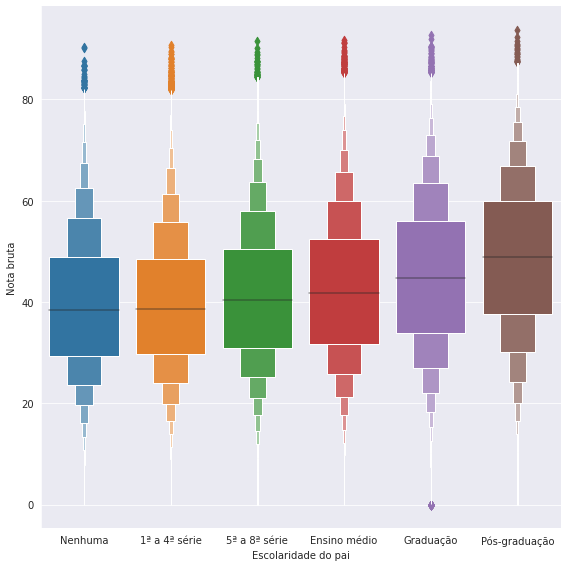

In [10]:
categories = {
    'A': 'Nenhuma', 'B': '1ª a 4ª série', 'C': '5ª a 8ª série',
    'D': 'Ensino médio', 'E': 'Graduação', 'F': 'Pós-graduação'
}
plot_catplot_box(df, 'QE_I04', 'NT_GER', 'Escolaridade do pai', 'Nota bruta', categories)

## Escolaridade do pai
Esse indicador aproxima-se visualmente do anterior, o que pode demonstrar uma ligação entre os dois conjuntos de informações. O valor das notas cresce a medida em que aumenta-se a escolaridade do pai do candidato, tornando discrepante a diferença entre os candidatos com pai sem escolaridade alguma (50% das notas estão próximas da faixa 30 a 48 pontos) e os que o pai concluiu uma pós-graduação ou mais, responsáveis por ter a metade das notas próximas da faixa 37 a 60 pontos. Há semelhança na distribuição de notas entre os grupos que o pai não possui uma graduação, *o que pode indicar que pais com o ensino superior completo pressionem mais os filhos, influenciem de maneira positiva, e/ou que possam oferecer melhor preparo material e técnico (uma vez que já passaram por essa etapa e/ou tem melhores condições financeiras).*

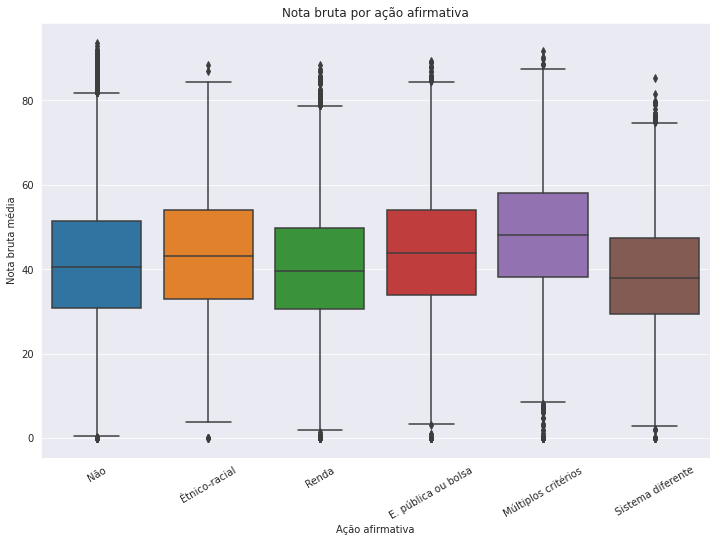

In [11]:
xlabel, ylabel, title = 'Ação afirmativa', 'Nota bruta média', 'Nota bruta por ação afirmativa'
categories = {
    'A': 'Não', 'B': 'Étnico-racial', 'C': 'Renda', 'D': 'E. pública ou bolsa',
    'E': 'Múltiplos critérios', 'F': 'Sistema diferente'
}
plot_boxplot(df, 'QE_I15', 'NT_GER', title, xlabel, ylabel, categories)

## Nota bruta por Ação Afirmativa (AA)
Os grupos que contaram com AA e possuem as menores notas são o de AA com base na renda (que como explicado em dados anteriores pode ser afetado pela necessidade de trabalhar em período próximo à avaliação ou não contar com materiais que dariam maior suporte) e o que contou com outros sistemas de ação afirmativa (que pode ser composto por pessoas com dificuldades motoras, cognitivas ou de outra natureza). **O grupo de pessoas que não contaram com AA obteve distribuição de nota inferior do que grupos que contaram com AA étnica, de escola pública / privada (com bolsa) e múltiplos critérios**.

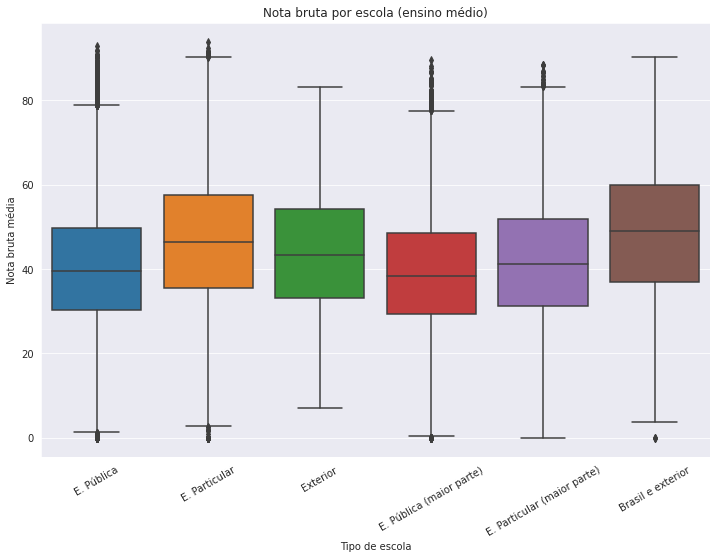

In [12]:
xlabel, ylabel, title = 'Tipo de escola', 'Nota bruta média', 'Nota bruta por escola (ensino médio)'
categories = {
    'A': 'E. Pública', 'B': 'E. Particular', 'C': 'Exterior',
    'D': 'E. Pública (maior parte)', 'E': 'E. Particular (maior parte)', 'F': 'Brasil e exterior'
}
plot_boxplot(df, 'QE_I17', 'NT_GER', title, xlabel, ylabel, categories)

## Nota bruta por tipo de escola (ensino médio)
Os dois grupos com menor distribuição de notas (50% na faixa de 30 a 50 pontos), cursaram o ensino médio (EM) no Brasil, em escola pública (integralmente ou maior parte do EM). Já os grupos que cursaram o EM integralmente em escola particular (no Brasil) ou no Brasil/Exterior, obtiveram as maiores notas, metade delas se concentram nas faixas 36 a 58 e 37 a 61, respectivamente. Um ponto curioso é que candidatos que cursaram a maior parte em escola pública obtiveram desempenho geral inferior que aqueles que cursaram integralmente no modelo, o mesmo vale para candidatos que cursaram o EM majoritariamente em escola particular e os que o fizeram integralmente nas instituições privadas, *o que pode indicar fatores de transição, hábitos e adequação*.

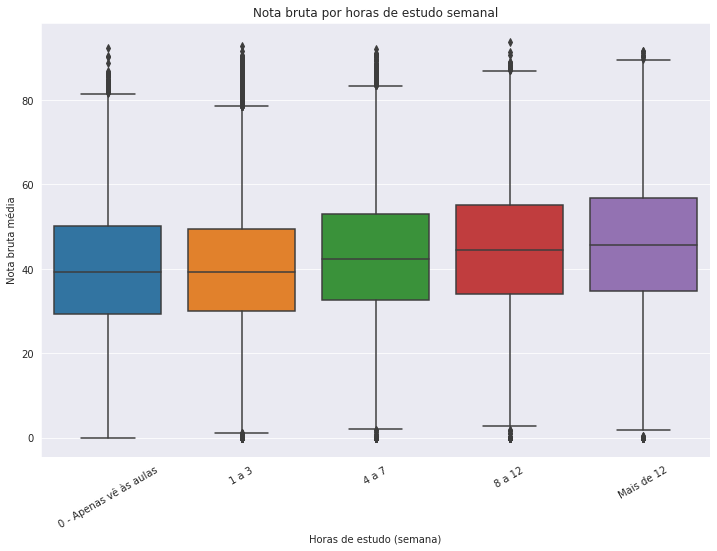

In [13]:
xlabel, ylabel, title = 'Horas de estudo (semana)', 'Nota bruta média', 'Nota bruta por horas de estudo semanal'
categories = {'A': '0 - Apenas vê às aulas', 'B': '1 a 3', 'C': '4 a 7', 'D': '8 a 12', 'E': 'Mais de 12'}
plot_boxplot(df, 'QE_I23', 'NT_GER', title, xlabel, ylabel, categories)

## Nota bruta por horas de estudo
Neste *boxplot* é possível notar que alunos que estudaram até 3 horas semanais apresentaram desempenho semelhante, com metade das notas na faixa de 30 a 50; enquanto grupos que estudaram acima de 8 horas, obtiveram metade das notas próxima à faixa 34 a 57. O primeiro grupo, que alegou não estudar e obteve desempenho semelhante aos que estudaram até 3 horas, reforça necessidade de aulas atrativas, contextualizadas e docentes com didática compreensível. É notável o aumento das notas junto às horas de estudo, portanto, é necessário cruzar esse indicador com informações de renda familiar, vínculo empregatício, escolaridade dos pais, motivação sobre a avaliação e outras pertinentes para identificar as causas de haver grupos com número baixo de horas de estudo semanal.